In [1]:
# Chargement des packages nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des données

On importe les données de 2020 à 2022

In [3]:
# Année 2022
df_carac_2022 = pd.read_csv("../data/caracteristiques_2022.csv", sep=';', low_memory=False)
df_lieux_2022 = pd.read_csv("../data/lieux_2022.csv", sep=';', low_memory=False)
df_usagers_2022 = pd.read_csv("../data/usagers_2022.csv", sep=';', low_memory=False)
df_vehicules_2022 = pd.read_csv("../data/vehicules_2022.csv", sep=';', low_memory=False)

# Année 2021
df_carac_2021 = pd.read_csv("../data/caracteristiques_2021.csv", sep=';', low_memory=False)
df_lieux_2021 = pd.read_csv("../data/lieux_2021.csv", sep=';', low_memory=False)
df_usagers_2021 = pd.read_csv("../data/usagers_2021.csv", sep=';', low_memory=False)
df_vehicules_2021 = pd.read_csv("../data/vehicules_2021.csv", sep=';', low_memory=False)

# Année 2020
df_carac_2020 = pd.read_csv("../data/caracteristiques_2020.csv", sep=';', low_memory=False)
df_lieux_2020 = pd.read_csv("../data/lieux_2020.csv", sep=';', low_memory=False)
df_usagers_2020 = pd.read_csv("../data/usagers_2020.csv", sep=';', low_memory=False)
df_vehicules_2020 = pd.read_csv("../data/vehicules_2020.csv", sep=';', low_memory=False)


# Jointure

In [5]:
# On modifie le nom de la colonne de df_carac_2022

df_carac_2022.rename(columns={'Accident_Id': 'Num_Acc'}, inplace=True)

In [6]:
# On joint les df par années

df_merged_2022_1 = pd.merge(df_usagers_2022, df_vehicules_2022, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2022_2 = pd.merge(df_merged_2022_1, df_lieux_2022, on='Num_Acc')
df_merged_2022 = pd.merge(df_merged_2022_2, df_carac_2022, on='Num_Acc')

In [7]:
# On fait de même avec les autres années

df_merged_2021_1 = pd.merge(df_usagers_2021, df_vehicules_2021, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2021_2 = pd.merge(df_merged_2021_1, df_lieux_2021, on='Num_Acc')
df_merged_2021 = pd.merge(df_merged_2021_2, df_carac_2021, on='Num_Acc')

df_merged_2020_1 = pd.merge(df_usagers_2020, df_vehicules_2020, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2020_2 = pd.merge(df_merged_2020_1, df_lieux_2020, on='Num_Acc')
df_merged_2020 = pd.merge(df_merged_2020_2, df_carac_2020, on='Num_Acc')

In [8]:
# On concat le tout dans un seul df

df_merged = pd.concat([df_merged_2022, df_merged_2021, df_merged_2020], axis=0, ignore_index=True)

In [9]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361205 entries, 0 to 361204
Data columns (total 55 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      361205 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  361205 non-null  object 
 3   num_veh      361205 non-null  object 
 4   place        361205 non-null  int64  
 5   catu         361205 non-null  int64  
 6   grav         361205 non-null  int64  
 7   sexe         361205 non-null  int64  
 8   an_nais      355264 non-null  float64
 9   trajet       361205 non-null  int64  
 10  secu1        361205 non-null  int64  
 11  secu2        361205 non-null  int64  
 12  secu3        361205 non-null  int64  
 13  locp         361205 non-null  int64  
 14  actp         361205 non-null  object 
 15  etatp        361205 non-null  int64  
 16  senc         361205 non-null  int64  
 17  catv         361205 non-null  int64  
 18  obs          361205 non-

## Preprocessing

Observations dupliquées ?

In [12]:
print('Nombre de lignes dupliquées :', df_merged.duplicated().sum())

Nombre de lignes dupliquées : 63


In [13]:
# On supprime les lignes dupliquées

df_merged = df_merged.drop_duplicates(keep = 'first')

In [14]:
print('Nombre de lignes dupliquées :', df_merged.duplicated().sum())

Nombre de lignes dupliquées : 0


Les variables peuvent prendre la valeur de '-1' qui signifie 'Non renseigné'. Pour mieux gérer le nettoyage du df, on remplace cette valeur par un NaN.


In [16]:
df_merged = df_merged.replace(-1, np.nan)
df_merged = df_merged.replace('-1', np.nan)  # Si format txt
df_merged = df_merged.replace(' -1', np.nan)  # Si format txt

Visualisation des taux de NaN par variable

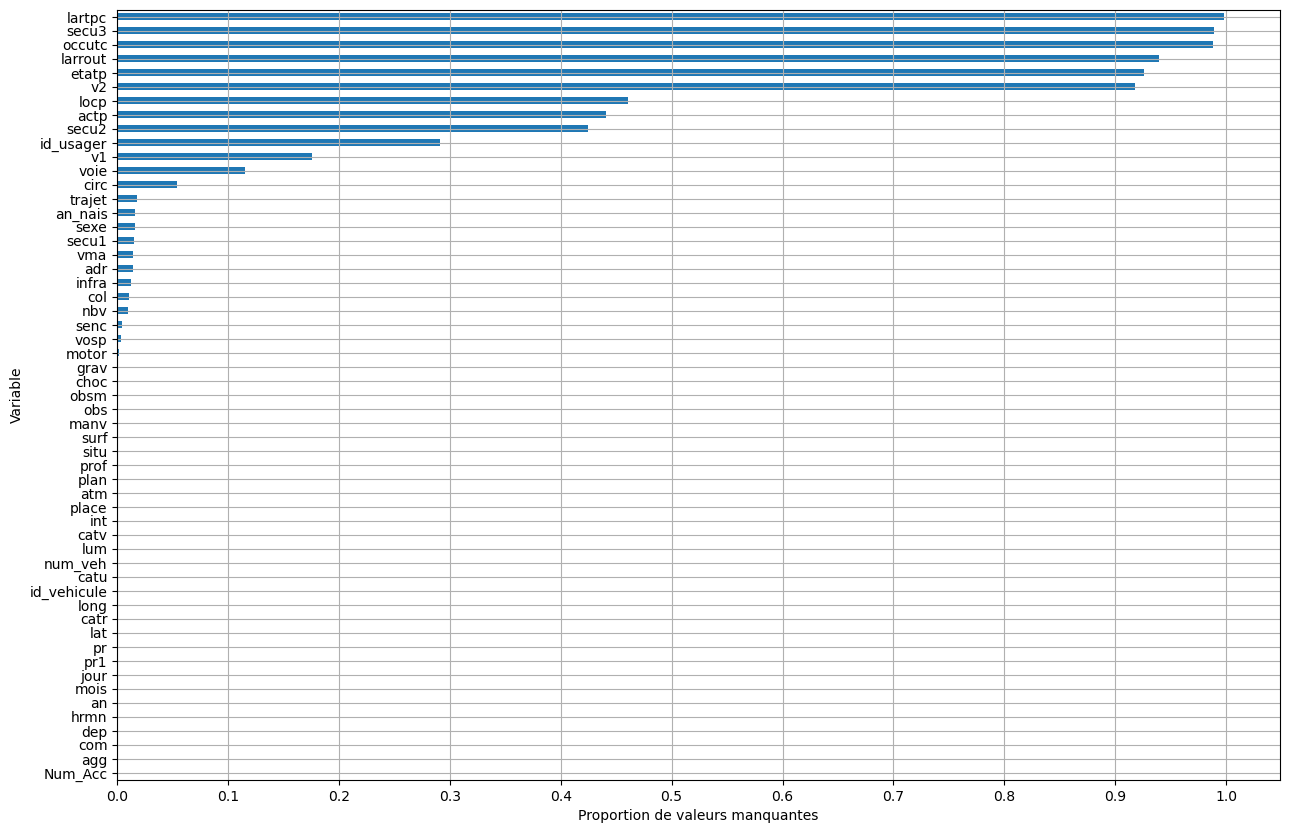

In [18]:
nan_col = df_merged.isna().sum().sort_values(ascending=True)/df_merged.shape[0]
nan_col.plot.barh(figsize=(15,10))  # On trace via pandas
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True)
plt.xlabel('Proportion de valeurs manquantes')
plt.ylabel('Variable')
plt.show();

Les variables suivantes ont des taux de NaN supérieurs à 10% :
- lartpc : largeur du TPC si existe
- secu3 : Présence et utilisation d'un équipeemnt de sécurité (3eme renseignement possible)
- occutc : Nb d'occupants dans le transport en commun
- larrout : Largeur de la chaussée
- etatp : Si piéton accidenté accompagné ou non
- v2 : Lettre indice alphanum de la route
- locp : Localisation du piéton
- actp : Action du piéton
- secu2 : Présence et utilisation d'un équipeemnt de sécurité (2eme renseignement possible)
- id_usager : Identifiant unique de l'usager (que depuis 2021)
- v1 : Indice num du numéro de route
- voie : Numéro de la route

Au vu du nombre important de NaN, ces variables ne seront pas analysées (gestion des NaN peu envisageable). Nous faisons cependant l'exception pour les équipements de sécurité. Ils seront regroupés dans des variables pour chaque élément.

3 variables concernant les piétons sont également non utilisables. Pour la suite, on retirera également les autres variables en lien avec des piétons (catu = 3 (Piéton))

Pour la localisation des accidents, du fait d'avoir les latitudes et longitudes, nous pouvons supprimer les autres variables. Nous gardons tout de même la variable dep (département) et com (commune).

In [21]:
df_merged = df_merged.drop(['lartpc', 'occutc', 'larrout', 'etatp', 'locp', 'actp', 'id_usager',
                            'voie', 'v1', 'v2', 'adr', 'pr', 'pr1'], axis=1)

df_merged = df_merged[df_merged["catu"] != 3]

On trie les variables 'secu', 'secu2' et 'secu3'

In [23]:
df_merged['Ceinture'] = df_merged[['secu1', 'secu2', 'secu3']].isin([1]).any(axis=1)
df_merged['Casque'] = df_merged[['secu1', 'secu2', 'secu3']].isin([2]).any(axis=1)
df_merged['Dispositif enfants'] = df_merged[['secu1', 'secu2', 'secu3']].isin([3]).any(axis=1)
df_merged['Gilet réfléchissant'] = df_merged[['secu1', 'secu2', 'secu3']].isin([4]).any(axis=1)
df_merged['Airbag'] = df_merged[['secu1', 'secu2', 'secu3']].isin([5, 7]).any(axis=1)
df_merged['Gants'] = df_merged[['secu1', 'secu2', 'secu3']].isin([6, 7]).any(axis=1)
df_merged['Autre equipement'] = df_merged[['secu1', 'secu2', 'secu3']].isin([9]).any(axis=1)

df_merged = df_merged.drop(['secu1', 'secu2', 'secu3'], axis=1)

On enlève les limitations de vitesse > à 130 km/h

In [25]:
df_merged.loc[df_merged['vma'] > 130, 'vma'] = np.nan

On convertit dans le bon format les latitudes et longitudes

In [27]:
df_merged['lat'] = df_merged['lat'].str.replace(',', '.').astype(float)
df_merged['long'] = df_merged['long'].str.replace(',', '.').astype(float)

On ne garde pas les victimes trop vieilles

In [29]:
df_merged = df_merged[df_merged["an_nais"] >= 1920]

In [30]:
# On convertit le df pour avoir des dates exploitables

df_merged['date'] = df_merged['jour'].astype(str) + '-' + df_merged['mois'].astype(str) + '-' + df_merged['an'].astype(str) + '-' 
df_merged['date'] = pd.to_datetime(df_merged['date'], dayfirst=True)


In [31]:
# On crée une variable région

region = pd.read_csv("../data/departements-region.csv")
region = region.rename(columns={'num_dep': 'dep'})

df_merged = df_merged.merge(region, how='left', on='dep')

### Traitement de la donnée en vue de la modélisation
Ce regroupement se base sur les observations faites lors de la data visualisation

In [33]:
# On crée une variable heure

df_merged['hrmn'] = df_merged['hrmn'].str.replace(':', '')
df_merged['heure'] = df_merged['hrmn'].astype(int)//100

# On supprime la variable initiale
df_merged = df_merged.drop(['hrmn'], axis=1)


In [34]:
# Variable place : place dans le véhicule

# Modalité : 1 à 9
# On regroupe en 3 catégories : conducteur, passager avant, passager arrière
df_merged['place'] = df_merged['place'].astype(int)

df_merged['conducteur'] = df_merged['place'].apply(lambda x: 1 if x==1 else 0)
df_merged['passager_avant'] = df_merged['place'].apply(lambda x: 1 if x in [2, 6] else 0)
df_merged['passager_arrière'] = df_merged['place'].apply(lambda x: 1 if x not in [1, 2, 6] else 0)

# On supprime la variable initiale
df_merged = df_merged.drop(['place'], axis=1)


In [35]:
# Variable catu : conducteur ou passager

# Modalité 1 (conducteur) ou 2 (passager)
# Le nombre d'occurence entre conducteur ou passager n'est pas cohérent avec celui de la variable place
# (263561 conducteurs contre 263915 pour variable catu)
# On garde la variable place car plus précise

df_merged = df_merged.drop(['catu'], axis=1)


In [36]:
# Variable grav : gravité de l'accident

# Modalité : 'Indemne' (1), 'Tué' (2), 'Blessé hospitalisé' (3), 'Blessé léger' (4)
# Variable cible
# On supprime le seul NaN présent

df_merged = df_merged.dropna(subset=['grav'])
df_merged['grav'] = df_merged['grav'].astype(int)


In [37]:
# Variable sexe : sexe de l'usager

# Modalité : Masculin' (1), 'Féminin' (2)
# Nb NaN : 4, on remplace par le mode

df_merged['sexe'] = df_merged['sexe'].fillna(df_merged['sexe'].mode()[0])
df_merged['sexe'] = df_merged['sexe'].astype(int)


In [38]:
# Variable an_nais : année de naissance de l'usager

# On tranforme cette variable pour connaître l'âge de l'usager
df_merged['an_nais'] = df_merged['an_nais'].astype(int)

df_merged['age'] = df_merged['an'] - df_merged['an_nais']


In [39]:
# Variable trajet : motif du trajet

# Modalité : 5.  9.  4.  0. nan  2.  3.  1.
# Nb NaN : 503, on remplace par le mode

df_merged['trajet'] = df_merged['trajet'].replace(0, np.nan)
df_merged['trajet'] = df_merged['trajet'].fillna(df_merged['trajet'].mode()[0])
df_merged['trajet'] = df_merged['trajet'].astype(int)

# On regroupe en 3 catégorie : autre, pro ou perso
df_merged['trajet_pro'] = df_merged['trajet'].apply(lambda x: 1 if x in [1, 4] else 0)
df_merged['trajet_perso'] = df_merged['trajet'].apply(lambda x: 1 if x in [2, 3, 5] else 0)
df_merged['trajet_autre'] = df_merged['trajet'].apply(lambda x: 1 if x==9 else 0)

df_merged = df_merged.drop(['trajet'], axis=1)


In [40]:
# Variable senc : sens de circulation

# Modalité : 0 1 2 3
# Nb NaN : 1376, on les place dans la catégorie inconnu

df_merged['senc'] = df_merged['senc'].fillna(0)
df_merged['senc'] = df_merged['senc'].astype(int)


In [41]:
# Variable catv : categorie du vehicule

# Modalité : nombreuse
# Nb NaN : 3, on les place dans le mode

df_merged['catv'] = df_merged['catv'].fillna(0)
df_merged['catv'] = df_merged['catv'].astype(int)

# On regroupe en sous-catégorie
df_merged['catv_velo'] = df_merged['catv'].apply(lambda x: 1 if x in [1,80] else 0)
df_merged['catv_moto'] = df_merged['catv'].apply(lambda x: 1 if x in [2,4,5,30,31,32,33,34] else 0)
df_merged['catv_voiture'] = df_merged['catv'].apply(lambda x: 1 if x in [7] else 0)
df_merged['catv_utilitaire'] = df_merged['catv'].apply(lambda x: 1 if x in [10] else 0)
df_merged['catv_veh_remorque'] = df_merged['catv'].apply(lambda x: 1 if x in [8,9,11,12] else 0)
df_merged['catv_PL'] = df_merged['catv'].apply(lambda x: 1 if x in [13,14,15] else 0)
df_merged['catv_tracteur'] = df_merged['catv'].apply(lambda x: 1 if x in [16,17,21] else 0)
df_merged['catv_tram_train'] = df_merged['catv'].apply(lambda x: 1 if x in [19,39,40] else 0)
df_merged['catv_quad_3roues'] = df_merged['catv'].apply(lambda x: 1 if x in [135,36,41,42,43] else 0)
df_merged['catv_autre_inconnu'] = df_merged['catv'].apply(lambda x: 1 if x in [0,3,6,18,20,99] else 0)
df_merged['catv_bus_car'] = df_merged['catv'].apply(lambda x: 1 if x in [37,38] else 0)
df_merged['catv_EDP'] = df_merged['catv'].apply(lambda x: 1 if x in [50,60] else 0)

df_merged = df_merged.drop(['catv'], axis=1)


In [42]:
# Variable obs : obstacle heurté

# Modalité : nombreuse
# Nb NaN : 94, on les place dans le mode

df_merged['obs'] = df_merged['obs'].fillna(df_merged['obs'].mode()[0])
df_merged['obs'] = df_merged['obs'].astype(int)


In [43]:
# Variable obsm : obstacle mobile heurté

# Modalité : nombreuse
# Nb NaN : 129, on les place dans le mode

df_merged['obsm'] = df_merged['obsm'].fillna(df_merged['obsm'].mode()[0])
df_merged['obsm'] = df_merged['obsm'].astype(int)


In [44]:
# Variable choc : point de choc

# Modalité : 0 à 9
# Nb NaN : 118, on les place dans le mode

df_merged['choc'] = df_merged['choc'].fillna(df_merged['choc'].mode()[0])
df_merged['choc'] = df_merged['choc'].astype(int)

# On regroupe en sous-catégorie
df_merged['choc_avant'] = df_merged['choc'].apply(lambda x: 1 if x in [1,2,3] else 0)
df_merged['choc_arriere'] = df_merged['choc'].apply(lambda x: 1 if x in [4,5,6] else 0)
df_merged['choc_cote'] = df_merged['choc'].apply(lambda x: 1 if x in [7,8] else 0)
df_merged['choc_tonneaux'] = df_merged['choc'].apply(lambda x: 1 if x in [9] else 0)
df_merged['choc_aucun'] = df_merged['choc'].apply(lambda x: 1 if x in [0] else 0)

df_merged = df_merged.drop(['choc'], axis=1)


In [45]:
# Variable manv : manoeuvre lors de l'accident

# Modalité : nombreuse
# Nb NaN : 79, on les place dans le mode

df_merged['manv'] = df_merged['manv'].fillna(df_merged['manv'].mode()[0])
df_merged['manv'] = df_merged['manv'].astype(int)

# On regroupe en sous-catégorie
df_merged['manv_diverse'] = df_merged['manv'].apply(lambda x: 1 if x in [3,4,5,6,7,8,9,10,19,20,21,22,23,24,25,26] else 0)
df_merged['manv_droite'] = df_merged['manv'].apply(lambda x: 1 if x in [12,14,16,18] else 0)
df_merged['manv_gauche'] = df_merged['manv'].apply(lambda x: 1 if x in [11,13,15,17] else 0)
df_merged['manv_pas_chang_dir'] = df_merged['manv'].apply(lambda x: 1 if x in [1] else 0)
df_merged['manv_meme_sens_file'] = df_merged['manv'].apply(lambda x: 1 if x in [2] else 0)
df_merged['manv_inconnue'] = df_merged['manv'].apply(lambda x: 1 if x in [0] else 0)

df_merged = df_merged.drop(['manv'], axis=1)


In [46]:
# Variable motor : type de moteur

# Modalité : 0 à 6
# Nb NaN : 420

df_merged['motor'] = df_merged['motor'].fillna(0)
df_merged['motor'] = df_merged['motor'].astype(int)


In [47]:
# Variable catr : type de route

# Modalité : 1 à 7, 9
# Nb NaN : 0

df_merged['catr'] = df_merged['catr'].astype(int)


In [48]:
# Variable circ : régime de circulation

# Modalité : 1 à 4
# Nb NaN : 16866 (5% de NaN) -> on essaie de réduire le nb NaN via d'autre variables

# On regroupe en une catégorie : bidirectionnelle ou non

df_merged['circ'] = df_merged['circ'].fillna(df_merged['circ'].mode()[0])
df_merged['chaussee_bidirectionnelle'] = df_merged['circ'].apply(lambda x: 1 if x == 2 else 0)

df_merged['circ'] = df_merged['circ'].astype(int)
df_merged = df_merged.drop(['circ'], axis=1)


In [49]:
# Variable nbv : nombre de voies

# Modalité : 0 à 12
# Nb NaN : 2624

df_merged['nbv'] = df_merged['nbv'].replace('#ERREUR', np.nan)
df_merged['nbv'] = df_merged['nbv'].fillna(df_merged['nbv'].mode()[0])
df_merged['nbv'] = df_merged['nbv'].astype(int)


In [50]:
# Variable vosp : présence d'une voie réservée

# Modalité : 0 à 3
# Nb NaN : 1232

df_merged['vosp'] = df_merged['vosp'].fillna(df_merged['vosp'].mode()[0])
df_merged['voie_reservee'] = df_merged['vosp'].apply(lambda x: 0 if x == 0 else 1)

df_merged = df_merged.drop(['vosp'], axis=1)


In [51]:
# Variable prof : profil en long

# Modalité : 1 à 4
# Nb NaN : 44

df_merged['prof'] = df_merged['prof'].fillna(df_merged['prof'].mode()[0])
df_merged['prof'] = df_merged['prof'].astype(int)


In [52]:
# Variable plan : tracé en plan

# Modalité : 1 à 4
# Nb NaN : 39

df_merged['plan'] = df_merged['plan'].fillna(df_merged['plan'].mode()[0])
df_merged['plan'] = df_merged['plan'].astype(int)


In [53]:
# Variable surf : état de la chaussée

# Modalité : 1 à 9
# Nb NaN : 58

df_merged['surf'] = df_merged['surf'].fillna(df_merged['surf'].mode()[0])
df_merged['surf'] = df_merged['surf'].astype(int)

# On regroupe en une catégorie : chaussée sèche ou non
df_merged['chaussee_seche'] = df_merged['surf'].apply(lambda x: 1 if x == 1 else 0)

df_merged = df_merged.drop(['surf'], axis=1)


In [54]:
# Variable infra : présence d'un aménagement

# Modalité : 0 à 9
# Nb NaN : 3774

df_merged['infra'] = df_merged['infra'].fillna(df_merged['infra'].mode()[0])
df_merged['infra'] = df_merged['infra'].astype(int)


In [55]:
# Variable situ : situation de l'accident

# Modalité : 1 à 8
# Nb NaN : 42

df_merged['situ'] = df_merged['situ'].fillna(df_merged['situ'].mode()[0])
df_merged['situ'] = df_merged['situ'].astype(int)


In [56]:
# Variable vma : vitesse maximale autorisée

# Modalité : nombreuses
# Nb NaN : 4907

df_merged['vma'] = df_merged['vma'].fillna(df_merged['vma'].mode()[0])
df_merged['vma'] = df_merged['vma'].astype(int)

# On regroupe en sous catégorie
df_merged['vma'] = df_merged['vma'].apply(lambda x: 30 if x<=30. else x)


In [57]:
# Variable lum : luminosité

# Modalité : 1 à 5
# Nb NaN : 7

df_merged['lum'] = df_merged['lum'].fillna(df_merged['lum'].mode()[0])
df_merged['lum'] = df_merged['lum'].astype(int)


In [58]:
# Variable agg : si en agglomération

# Modalité : 1, 2
# Nb NaN : 0

df_merged['agg'] = df_merged['agg'].astype(int)


In [59]:
# Variable int : si intersection

# Modalité : 1 à 9
# Nb NaN : 19

df_merged['int'] = df_merged['int'].fillna(df_merged['int'].mode()[0])
df_merged['int'] = df_merged['int'].astype(int)

# On regroupe en sous-catégorie
df_merged['int_aucune'] = df_merged['int'].apply(lambda x: 1 if x in [1] else 0)
df_merged['int_branches'] = df_merged['int'].apply(lambda x: 1 if x in [2,3,4,5] else 0)
df_merged['int_autre'] = df_merged['int'].apply(lambda x: 1 if x in [6,7,8,9] else 0)

df_merged = df_merged.drop(['int'], axis=1)


In [60]:
# Variable atm : condition atmo

# Modalité : 1 à 9
# Nb NaN : 19

df_merged['atm'] = df_merged['atm'].fillna(df_merged['atm'].mode()[0])
df_merged['atm'] = df_merged['atm'].astype(int)

# On regroupe en une catégorie : cbeau temps ou non
df_merged['atm_normal'] = df_merged['atm'].apply(lambda x: 1 if x == 1 else 0)

df_merged = df_merged.drop(['atm'], axis=1)


In [61]:
# Variable col : type de collision

# Modalité : 1 à 7
# Nb NaN : 3646

df_merged['col'] = df_merged['col'].fillna(df_merged['col'].mode()[0])
df_merged['col'] = df_merged['col'].astype(int)


In [62]:
# Variables équipement

for item in ['Ceinture', 'Casque', 'Dispositif enfants', 'Gilet réfléchissant', 'Airbag', 'Gants', 'Autre equipement']:
    df_merged[item] = df_merged[item].apply(lambda x: 1 if x else 0)


In [63]:
df_merged_2 = df_merged.drop(['Num_Acc', 'id_vehicule', 'num_veh', 'dep', 'com', 'date', 'dep_name', 'region_name'], axis=1)

In [64]:
num_features = ['heure', 'an_nais', 'age', 'nbv', 'vma', 'lat', 'long', 'jour', 'mois', 'an']
to_cat_features = ['senc', 'obs', 'obsm', 'motor', 'catr', 'prof', 'plan', 'infra', 'situ', 'lum', 'col']


In [65]:
df_cat = df_merged_2.drop(num_features, axis=1)

In [66]:
X = df_cat.drop('grav', axis=1)
y = df_cat['grav']

In [67]:
X = pd.get_dummies(X, columns=to_cat_features, drop_first=True)

### Split du jeu de données

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [205]:
X_train.to_csv("X_train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

# Recherche des meilleurs hyperparamètres

Rappel des modèles avec les meilleurs scores :

**RandomForestClassifier**
- Accuracy : 0.68 (train) ; 0.60 (test)
- F1 score : 0.67 (train) ; 0.58 (test)

**LGBMClassifier**
- Accuracy : 0.62 (train) ; 0.62 (test)
- F1 score : 0.60 (train) ; 0.60 (test)

**GradientBoostingClassifier**
- Accuracy : 0.67 (train) ; 0.66 (test)
- F1 score : 0.58 (train) ; 0.57 (test)


**Création d'une fonction pour effectuer du RandomSearch et du GridSearch**  
<ins>Objectif :</ins> RandomSearch donne un autre de grandeur pour certains hyperparamètres de chaque modèle. Ensuite avec GridSearch
on fait une recherche plus précise autour de ces hyperparamètres.

In [ ]:
# Attention temps de calcul très long > 12h
# Exemple de paramètres pour chercher les meilleurs hyperparamètres
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Définition des modèles
rf = RandomForestClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Définition des grilles de paramètres pour GridSearch
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

param_grid_lgbm = {'num_leaves': [20, 40, 50, 60],
                   'max_depth': [-1, 0, 1],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'n_estimators': [300, 500, 800],
                   'min_child_samples': [5, 10, 15],
                   'subsample': [0.4, 0.6, 0.8],
                   'colsample_bytree': [0.8, 1.0, 1.2],
                   'reg_alpha': [0.8, 1, 1.2],
                   'reg_lambda': [0.3, 0.5, 0.8]}

param_grid_gb = {'n_estimators': [100, 200, 300],
                 'max_depth': [3, 4, 5],
                 'learning_rate': [0.01, 0.1, 0.3],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Définition des distributions de paramètres pour RandomSearch
param_dist_rf = {'n_estimators': np.arange(100, 1000, 100),
                 'max_depth': [None] + list(np.arange(10, 110, 10)),
                 'min_samples_split': np.arange(2, 21),
                 'min_samples_leaf': np.arange(1, 21)}

param_dist_lgbm = param_dist = {'num_leaves': [20, 31, 50, 100],
                                'max_depth': [-1, 5, 10, 20],
                                'learning_rate': [0.01, 0.05, 0.1],
                                'n_estimators': [100, 200, 300, 500],
                                'min_child_samples': [5, 10, 20, 30],
                                'subsample': [0.6, 0.8, 1.0],
                                'colsample_bytree': [0.6, 0.8, 1.0],
                                'reg_alpha': [0, 0.1, 0.5, 1],
                                'reg_lambda': [0, 0.1, 0.5, 1]}

param_dist_gb = {'n_estimators': np.arange(100, 1000, 100),
                 'max_depth': np.arange(3, 10),
                 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                 'min_samples_split': np.arange(2, 21),
                 'min_samples_leaf': np.arange(1, 21)}

# Fonction pour effectuer la recherche d'hyperparamètres et retourner les meilleurs résultats
def perform_search(model, param_grid, param_dist, X_train, y_train, search_type='grid'):
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    else:
        search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
    
    search.fit(X_train, y_train)
    return search.best_params_, search.best_score_

# Liste des modèles et leurs paramètres correspondants
models = [rf, lgbm, gb]
param_grids = [param_grid_rf, param_grid_lgbm, param_grid_gb]
param_dists = [param_dist_rf, param_dist_lgbm, param_dist_gb]
model_names = ['RandomForest', 'LGBM', 'GradientBoosting']

# Application de la fonction pour chaque modèle
for model, param_grid, param_dist, name in zip(models, param_grids, param_dists, model_names):
    print(f"\nOptimisation pour {name}:")
    
    # GridSearch
    print("GridSearch:")
    best_params_grid, best_score_grid = perform_search(model, param_grid, param_dist, X_train, y_train, search_type='grid')
    print(f"Meilleurs paramètres: {best_params_grid}")
    print(f"Meilleur score: {best_score_grid}")
    
    # RandomSearch
    print("\nRandomSearch:")
    print(model)
    best_params_random, best_score_random = perform_search(model, param_grid, param_dist, X_train, y_train, search_type='random')
    print(f"Meilleurs paramètres: {best_params_random}")
    print(f"Meilleur score: {best_score_random}")
    
    # Comparaison des performances sur l'ensemble de test
    model_grid = model.set_params(**best_params_grid)
    model_grid.fit(X_train, y_train)
    y_pred_grid = model_grid.predict(X_test)
    
    model_random = model.set_params(**best_params_random)
    model_random.fit(X_train, y_train)
    y_pred_random = model_random.predict(X_test)
    
    print(f"\nPrécision sur l'ensemble de test:")
    print(f"GridSearch: {accuracy_score(y_test, y_pred_grid)}")
    print(f"RandomSearch: {accuracy_score(y_test, y_pred_random)}")


*Exemples de résultats*  
**Optimisation pour GradientBoosting:**  
GradientBoostingClassifier(random_state=42)  
Fitting 5 folds for each of 10 candidates, totalling 50 fits  
Meilleurs paramètres: {'n_estimators': 700, 'min_samples_split': 11, 'min_samples_leaf': 18, 'max_depth': 6, 'learning_rate': 0.05}  
Meilleur score: 0.6597597260150307  
Précision sur l'ensemble de test: 0.6611971025543271  

**Optimisation pour RandomForest:**  
RandomSearch: RandomForestClassifier(random_state=42)  
Fitting 5 folds for each of 10 candidates, totalling 50 fits  
Meilleurs paramètres: {'n_estimators': 500, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_depth': None}  
Meilleur score: 0.6580288594857627  
Précision sur l'ensemble de test: 0.6592603888677088

**Optimisation pour LGBM:**  
Fitting 5 folds for each of 10 candidates, totalling 50 fits  
Meilleurs hyperparamètres trouvés:  
{'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 1.0}  
Meilleur score: 0.6607776580191809  
Score sur l'ensemble de test: 0.6606023637056805  


## Représentation des meilleurs scores parmi ces trois modèles

### GradientBoostingClassifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score

model_boost = GradientBoostingClassifier(n_estimators=700,
                                         min_samples_split=11,
                                         min_samples_leaf=18,
                                         max_depth=6,
                                         learning_rate=0.05)
model_boost.fit(X_train, y_train)

y_pred_boost = model_boost.predict(X_test)
y_pred_boost_train = model_boost.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_boost))
print('Accuracy score train :', accuracy_score(y_train, y_pred_boost_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_boost, average='macro'))
print('Recall train :', recall_score(y_train, y_pred_boost_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_boost, average='macro'))
print('f1 score train :', f1_score(y_train, y_pred_boost_train, average='macro'))


Accuracy score test : 0.6611971025543271
Accuracy score train : 0.6855472994353728
----------
Recall test : 0.4639938880535011
Recall train : 0.5020761924309444
----------
f1 score test : 0.4733973301109602
f1 score train : 0.5261546710894007


### RandomForestClassifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score

model_rf = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  n_estimators=600)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_pred_rf_train = model_rf.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_rf))
print('Accuracy score train :', accuracy_score(y_train, y_pred_rf_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_rf, average='macro'))
print('Recall train :', recall_score(y_train, y_pred_rf_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_rf, average='macro'))
print('f1 score train :', f1_score(y_train, y_pred_rf_train, average='macro'))


Accuracy score test : 0.6621425848265345
Accuracy score train : 0.7728567234852095
----------
Recall test : 0.45297164919603705
Recall train : 0.5684350767411439
----------
f1 score test : 0.4562514157144081
f1 score train : 0.5945622540494602


### LGBMClassifier

In [150]:
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score

model_lgbm = LGBMClassifier(num_leaves=50,
                            max_depth=-1,
                            learning_rate=0.05,
                            n_estimators=500,
                            min_child_samples=10,
                            subsample=0.6,
                            colsample_bytree=1,
                            reg_alpha=1,
                            reg_lambda=0.5)

model_lgbm.fit(X_train, y_train)

y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_lgbm_train = model_lgbm.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_lgbm))
print('Accuracy score train :', accuracy_score(y_train, y_pred_lgbm_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_lgbm, average='macro'))
print('Recall train :', recall_score(y_train, y_pred_lgbm_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_lgbm, average='macro'))
print('f1 score train :', f1_score(y_train, y_pred_lgbm_train, average='macro'))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 262297, number of used features: 114
[LightGBM] [Info] Start training from score -0.811827
[LightGBM] [Info] Start training from score -3.702456
[LightGBM] [Info] Start training from score -1.930760
[LightGBM] [Info] Start training from score -0.951263
Accuracy score test : 0.6606023637056805
Accuracy score train : 0.6807397720904166
----------
Recall test : 0.46149330674601863
Recall train : 0.4897932117781068
----------
f1 score test : 0.46801714081564777
f1 score train : 0.5073272521003186


### Rappel sur les métriques

<ins>Exemple avec un modèle classification binaire :</ins>  
En face d’un tunnel, devons prédire si c’est une voiture (Positif) ou une moto (Négatif) qui en sortira.

**Recall =** nombre de voiture que notre modèle a prédit, et qui se sont avérés être effectivement des voitures, *divisé par l’ensemble des voitures qui ont traversé le tunnel*.

**Precision =** nombre de voiture que notre modèle a prédit, et qui se sont avérés être effectivement des voitures, *divisé par le nombre total de voiture que notre modèle a prédit, et qui se sont avérés être vrai (voiture) ou fausse (moto).*

**Recall**, on regarde le **nombre de positif** que le modèle a bien prédit **sur l’ensemble des positifs**.  Si le modèle prédit uniquement « positif », le recall sera élevé.

**Precision**, on regarde le **nombre de positif** que le modèle a bien prédit **sur l’ensemble des positifs prédit**.  Si le modèle ne prédit jamais « positif », la precision sera élevée.


***Synthèse :***  
- Plus le recall est haut, plus le modèle repère de positif
- Plus la precision est haute, moins le modèle se trompe sur les positifs


## Synthèse globale des modèles

- Scores assez similaires entre modèles
- Gradient Boosting présente de légères meilleures performances
- Précision plus élevée que le recall -> les modèles prédissent des vrais positifs
- Léger over-fitting 

# Resampling data

**Classes avec distribution hétérogène**

<ins>Objectif :</ins> Rééquilibrer les classes et voir l'influence sur la prédiction des modèles


In [125]:
from collections import Counter

# Afficher la distribution initiale
print("Distribution initiale des classes:", Counter(y_train))


Distribution initiale des classes: Counter({1: 116472, 4: 101313, 3: 38043, 2: 6469})


In [126]:
y_train.value_counts()

grav
1    116472
4    101313
3     38043
2      6469
Name: count, dtype: int64

#### Dans un premier temps, nous utilisons la librairie SMOTE

In [128]:
from imblearn.over_sampling import SMOTE

# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE uniquement sur les données d'entraînement
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [129]:
# On vérifie la nouvelle distribution
print("Distribution après SMOTE:", Counter(y_train_smote))

# X_test et y_test restent inchangés car ils doivent représenter la distribution réelle des données.

Distribution après SMOTE: Counter({1: 116472, 3: 116472, 4: 116472, 2: 116472})


X_test et y_test restent inchangés car ils doivent représenter la distribution réelle des données.  
On essaie de ne pas sur-équilibrer le jeu de données (peut créer du bruit)

#### On essaie maintenant la librairie SMOTETomek ou SMOTEENN qui combine oversampling (SMOTE) et undersampling

In [132]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Afficher la distribution initiale
print("Distribution initiale:", Counter(y_train))

# SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smt.fit_resample(X_train, y_train)

# Afficher la nouvelle distribution
print("Distribution après rééquilibrage:", Counter(y_train_smotetomek))


Distribution initiale: Counter({1: 116472, 4: 101313, 3: 38043, 2: 6469})
Distribution après rééquilibrage: Counter({2: 115732, 3: 112913, 1: 110333, 4: 109232})


A noter qu'il est aussi possible d'utiliser SMOTEENN. Différences principales :
- SMOTETomek : plus conservateur, supprime moins d'exemples
- SMOTEENN : plus agressif, peut supprimer plus d'exemples

#### On regarde le résultat des deux resampling sur le meilleur modèle

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score

model_boost_smote = GradientBoostingClassifier(n_estimators=700,
                                               min_samples_split=11,
                                               min_samples_leaf=18,
                                               max_depth=6,
                                               learning_rate=0.05)
model_boost_smote.fit(X_train_smote, y_train_smote)

y_pred_boost_smote = model_boost_smote.predict(X_test)
y_pred_boost_smote_train = model_boost_smote.predict(X_train_smote)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_boost_smote))
print('Accuracy score train :', accuracy_score(y_train_smote, y_pred_boost_smote_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_boost_smote, average='macro'))
print('Recall train :', recall_score(y_train_smote, y_pred_boost_smote_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_boost_smote, average='macro'))
print('f1 score train :', f1_score(y_train_smote, y_pred_boost_smote_train, average='macro'))


KeyboardInterrupt: 

In [ ]:
model_boost_smotetomek = GradientBoostingClassifier(n_estimators=700,
                                                    min_samples_split=11,
                                                    min_samples_leaf=18,
                                                    max_depth=6,
                                                    learning_rate=0.05)
model_boost_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

y_pred_boost_smotetomek = model_boost_smotetomek.predict(X_test)
y_pred_boost_smotetomek_train = model_boost_smotetomek.predict(X_train_smotetomek)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_boost_smotetomek))
print('Accuracy score train :', accuracy_score(y_train_smotetomek, y_pred_boost_smotetomek_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_boost_smotetomek, average='macro'))
print('Recall train :', recall_score(y_train_smotetomek, y_pred_boost_smotetomek_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_boost_smotetomek, average='macro'))
print('f1 score train :', f1_score(y_train_smotetomek, y_pred_boost_smotetomek_train, average='macro'))


#### Modification distribution manuelle

Afin d'éviter de créer trop de bruit, nous allons appliquer une stratégie personnalisée pour le resampling.

<ins>Actuellement :</ins>  
Classe 1 (indenme) : 116 472 usagers (44.4 %)  
Classe 4 (Blessé léger) : 101 313 usagers (38.6 %)  
Classe 3 (Blessé grave) : 38 043 usagers (14.5 %)  
Classe 2 (tué) : 6 469 usagers (2.5 %)  
(Total d'usagers : 262 297)

Nous allons voir l'impact en modifiant toutes les classes pour obtenir 25 % pour chacune.  
Nombre d'usagers par classe après modification = **65 574 usagers**.

In [177]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# RandomOverSampler pour augmenter le nombre d'échantillons des classes minoritaires (2 et 3).
# RandomUnderSampler pour réduire le nombre d'échantillons des classes majoritaires (1 et 4).
# Ces deux étapes sont combinées dans un Pipeline pour être appliquées séquentiellement.
n_samples = int(len(y_train))

# Création de la pipeline de resampling
over = RandomOverSampler(sampling_strategy={2: int(n_samples * 0.25), 3: int(n_samples * 0.25)})
under = RandomUnderSampler(sampling_strategy={1: int(n_samples * 0.25), 4: int(n_samples * 0.25)})

pipeline = Pipeline([('over', over), ('under', under)])

# Appliquer le resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Afficher la nouvelle distribution
print("\nNouvelle distribution après resampling :")
print(Counter(y_train_resampled))

# Vérifier les pourcentages
total = len(y_train_resampled)
for classe in [1, 2, 3, 4]:
    pourcentage = Counter(y_train_resampled)[classe] / total * 100
    print(f"Classe {classe}: {pourcentage:.2f}%")




Nouvelle distribution après resampling :
Counter({1: 65574, 2: 65574, 3: 65574, 4: 65574})
Classe 1: 25.00%
Classe 2: 25.00%
Classe 3: 25.00%
Classe 4: 25.00%


#### Application du meilleur modèle

In [179]:
model_boost_resampled = GradientBoostingClassifier(n_estimators=700,
                                                  min_samples_split=11,
                                                  min_samples_leaf=18,
                                                  max_depth=6,
                                                  learning_rate=0.05)
model_boost_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_boost_resampled = model_boost_resampled.predict(X_test)
y_pred_boost_resampled_train = model_boost_resampled.predict(X_train_resampled)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_boost_resampled))
print('Accuracy score train :', accuracy_score(y_train_resampled, y_pred_boost_resampled_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_boost_resampled, average='macro'))
print('Recall train :', recall_score(y_train_resampled, y_pred_boost_resampled_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_boost_resampled, average='macro'))
print('f1 score train :', f1_score(y_train_resampled, y_pred_boost_resampled_train, average='macro'))


Accuracy score test : 0.5961723217689668
Accuracy score train : 0.6475966084118706
----------
Recall test : 0.554732366105769
Recall train : 0.6475966084118706
----------
f1 score test : 0.4803870611511257
f1 score train : 0.6423642807608049


On voit une légère baisse de la précision mais un meilleur recall  
Le F1 score est également légèrement augmenté  
Over-fitting toujours présent (voire légère augmentation)

In [207]:
X_train_resampled.to_csv("X_train_resampled.csv")
y_train_resampled.to_csv("y_train_resampled.csv")

In [217]:
# Sauvegarde du modèle
import pickle

pickle.dump(model_boost_resampled, open('./best_model_GB_resampled.pkl', 'wb'))
#pickle.dump(model_lgbm, open('./best_model_LGBM.pkl', 'wb'))
#pickle.dump(model_rf, open('./best_model_rf.pkl', 'wb'))
#pickle.dump(model_boost, open('./best_model_boost.pkl', 'wb'))